**Run the following two cells before you begin.**

In [173]:
%autosave 10

Autosaving every 10 seconds


In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

**First, import the cleaned data set. Then, select the features from the DataFrame of the case study data.**
    
These features should be: `'LIMIT_BAL'`, `'EDUCATION'`, `'MARRIAGE'`, `'AGE'`, `'PAY_1'`, `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`, `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, AND `'PAY_AMT6'`.

In [175]:
# Import data set
df = pd.read_csv(r"C:/Users/Hemant/Desktop/cleaned_data.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [176]:
# Create features list
features=df[['LIMIT_BAL','EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1','BILL_AMT2', 'BILL_AMT3',
             'BILL_AMT4', 'BILL_AMT5','BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3','PAY_AMT4', 'PAY_AMT5','PAY_AMT6']]
features.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,1,24,2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,26,-1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,34,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,1,37,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,2,1,57,-1,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


_____________________________________________________
**Next, make a 80:20 train/test split using a random seed of 24.**

In [177]:
# Putting feature variable to X
X = features

# Putting response variable to y
y = df['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=24)

_____________________________________________________
**Then, instantiate the `MinMaxScaler` to scale the data.**

In [178]:
from sklearn.preprocessing import MinMaxScaler
min_max_sc = MinMaxScaler()

In [179]:
def GetScaledModel(nameOfScaler):
    nameOfScaler =='minmax'
    scaler = MinMaxScaler()

_____________________________________________________
**Next, instantiate a logistic regression model with the `saga` solver, L1 penalty, and set `max_iter` to 1,000 as we want the solver to have enough iterations to find a good solution.**

In [180]:
lr = LogisticRegression(solver='saga', penalty='l1', C=1000)
lr.fit(X_train, y_train)

LogisticRegression(C=1000, penalty='l1', solver='saga')

In [181]:
accuracy_score = lr.score(X_test, y_test)
accuracy_score 

0.7834239639977498

_____________________________________________________
**Next, import the `Pipeline` class and create a `Pipeline` with the scaler and the logistic regression model, using the names `'scaler'` and `'model'` for the steps, respectively.**

In [182]:
from sklearn.pipeline import Pipeline
scale_lr_pipeline = Pipeline(steps=[('scaler', min_max_sc), ('model', lr)])

scale_lr_pipeline.fit(X_train, y_train)

preds = scale_lr_pipeline.predict(X_test)
np.mean(preds == y_test)

0.814738421151322

_____________________________________________________
**Now, use the `get_params` method to view the parameters from each stage of the pipeline.**

In [195]:
# Use `get_params`
scale_lr_pipeline.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('model', LogisticRegression(C=2, penalty='l1', solver='saga'))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'model': LogisticRegression(C=2, penalty='l1', solver='saga'),
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'model__C': 2,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 100,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l1',
 'model__random_state': None,
 'model__solver': 'saga',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

**Use the `set_params` method to change the the `model__C` parameter to 2.**

In [196]:
# View what `model__C` is set to currently

scale_lr_pipeline.get_params()['model__C']

2

In [197]:
# Change `model__C` to 2
scale_lr_pipeline.set_params(model__C = 2)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 LogisticRegression(C=2, penalty='l1', solver='saga'))])

_____________________________________________________
**Then, create a smaller range of C values to test with cross-validation, as these models will take longer to train and test with more data than our previous activities.**

**Use C_vals = [$10^2$, $10$, $1$, $10^{-1}$, $10^{-2}$, $10^{-3}$].**


<details>
    <summary>Hint:</summary>
    Recall that exponents in Python use the ** operator.
</details>

In [187]:
from sklearn.model_selection import GridSearchCV

param = {'C':[100, 10, 1, .1, .01, .001]}
clf = GridSearchCV(lr,param,scoring='roc_auc',refit=True,cv=10)
clf.fit(X_train,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_))

Best roc_auc: 0.65, with best C: {'C': 10}


Now, define `k_folds` using `StratifiedKFold`. The number of folds should be 4. Set the random state to 1.

In [188]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

k_folds = StratifiedKFold(n_splits=4,shuffle=True,random_state=1)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in k_folds.split(X,y):
    print('{} of KFold {}'.format(i,k_folds.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    lr = LogisticRegression(C=2)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1

1 of KFold 4
ROC AUC score: 0.4999036051667631
2 of KFold 4
ROC AUC score: 0.5
3 of KFold 4
ROC AUC score: 0.49956728497010383
4 of KFold 4
ROC AUC score: 0.5002419187403429


_____________________________________________________
**Next, make a new version of the `cross_val_C_search` function, called `cross_val_C_search_pipe`. Instead of the model argument, this function will take a pipeline argument. The changes inside the function will be to set the `C` value using `set_params(model__C = <value you want to test>)` on the pipeline, replacing the model with the pipeline for the fit and `predict_proba` methods, and accessing the `C` value using `pipeline.get_params()['model__C']` for the printed status update.**

In [216]:
C_val_exponents = np.linspace(3,-3,13)
C_val_exponents

array([ 3. ,  2.5,  2. ,  1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5, -2. ,
       -2.5, -3. ])

In [217]:
C_vals = np.float(10)**C_val_exponents
C_vals

array([1.00000000e+03, 3.16227766e+02, 1.00000000e+02, 3.16227766e+01,
       1.00000000e+01, 3.16227766e+00, 1.00000000e+00, 3.16227766e-01,
       1.00000000e-01, 3.16227766e-02, 1.00000000e-02, 3.16227766e-03,
       1.00000000e-03])

In [237]:
from sklearn.metrics import roc_curve

def cross_val_C_search(k_folds, C_vals, lr, X, y):
    n_folds = k_folds.n_splits
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc = [[]]*len(C_vals)
    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc

cv_train_roc_auc, cv_test_roc_auc, cv_test_roc=cross_val_C_search(k_folds, C_vals, lr, X, y)

_____________________________________________________
**Now, run this function as in the previous activity, but using the new range of `C` values, the pipeline you created, and the features and response variable from the training split of the case study data.**

    You may see warnings here, or in later steps, about the non-convergence of the solver; you could experiment with the `tol` or `max_iter`` options to try and achieve convergence, although the results you obtain with `max_iter = 1000` are likely to be sufficient.

In [238]:
for c_val_counter in range(len(C_vals)):
    #Set the C value for the model object
    lr.C = C_vals[c_val_counter]
    #Count folds for each value of C
    fold_counter = 0
    
#Get training and testing indices for each fold
    for train_index, test_index in k_folds.split(X, y):
        #Subset the features and response, for training and testing data for this fold
        X_cv_train, X_cv_test = X_train, X_test
        y_cv_train, y_cv_test =y_train, y_test
        #Fit the model on the training data
        lr_syn=lr.fit(X_cv_train, y_cv_train)
        lr_syn

In [239]:
#Get the training ROC AUC
y_cv_train_predict_proba = lr_syn.predict_proba(X_cv_train)
cv_train_roc_auc[fold_counter, c_val_counter] =roc_auc_score(y_cv_train, y_cv_train_predict_proba[:,1])

In [240]:
#Get the testing ROC AUC
y_cv_test_predict_proba = lr_syn.predict_proba(X_cv_test)
cv_test_roc_auc[fold_counter, c_val_counter] = roc_auc_score(y_cv_test, y_cv_test_predict_proba[:,1])

In [241]:
#Testing ROC curves for each fold
this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
cv_test_roc[c_val_counter].append(this_fold_roc)
cv_test_roc

[[(array([0.00000000e+00, 0.00000000e+00, 2.39348971e-04, ...,
          9.98803255e-01, 9.98803255e-01, 1.00000000e+00]),
   array([0.00000000e+00, 8.65800866e-04, 8.65800866e-04, ...,
          9.98268398e-01, 1.00000000e+00, 1.00000000e+00]),
   array([1.53398796e+00, 5.33987964e-01, 4.93300639e-01, ...,
          6.50907586e-05, 5.60192355e-05, 4.01392648e-33]))],
 [(array([0.00000000e+00, 0.00000000e+00, 2.39348971e-04, ...,
          9.98803255e-01, 9.98803255e-01, 1.00000000e+00]),
   array([0.00000000e+00, 8.65800866e-04, 8.65800866e-04, ...,
          9.98268398e-01, 1.00000000e+00, 1.00000000e+00]),
   array([1.53398796e+00, 5.33987964e-01, 4.93300639e-01, ...,
          6.50907586e-05, 5.60192355e-05, 4.01392648e-33]))],
 [(array([0.00000000e+00, 0.00000000e+00, 2.39348971e-04, ...,
          9.98803255e-01, 9.98803255e-01, 1.00000000e+00]),
   array([0.00000000e+00, 8.65800866e-04, 8.65800866e-04, ...,
          9.98268398e-01, 1.00000000e+00, 1.00000000e+00]),
   array([1.

_____________________________________________________
**Plot the average training and testing ROC AUC across folds, for each `np.log(C_vals)` value.**

Text(0.5, 1.0, 'Cross validation scores averaged over all folds')

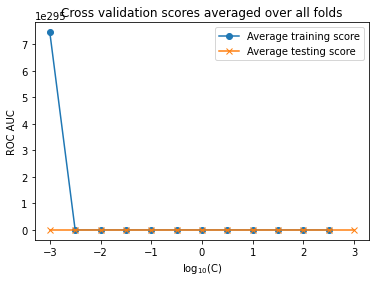

In [242]:
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis=0), '-o',
        label='Average training score')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-x',
        label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation scores averaged over all folds')

_____________________________________________________
**Up next, create interaction features for the case study data using scikit-learn's `PolynomialFeatures`. You should use 2 as the degree of polynomial features. Confirm that the number of new features makes sense.**

In [243]:
from sklearn.preprocessing import PolynomialFeatures
make_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

features_new = make_interactions.fit_transform(features)
print(features_new)

[[2.00000000e+04 2.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.20000000e+05 2.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  2.00000000e+06 0.00000000e+00]
 [9.00000000e+04 2.00000000e+00 2.00000000e+00 ... 1.00000000e+06
  5.00000000e+06 5.00000000e+06]
 ...
 [3.00000000e+04 2.00000000e+00 2.00000000e+00 ... 8.40000000e+06
  1.30200000e+07 6.20000000e+06]
 [8.00000000e+04 3.00000000e+00 1.00000000e+00 ... 1.02008664e+08
  3.47450400e+06 9.55470560e+07]
 [5.00000000e+04 2.00000000e+00 1.00000000e+00 ... 1.00000000e+06
  1.00000000e+06 1.00000000e+06]]


_____________________________________________________
**Finally, repeat the cross-validation procedure and observe the model performance now.**

In [244]:
# Using the new features, make a 80:20 train/test split using a random seed of 24.**

# Putting feature variable to X
X = features_new

# Putting response variable to y
y = df['default payment next month']

X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=24)

In [245]:
lr_new = LogisticRegression()
lr_new.fit(X_train_, y_train_)

LogisticRegression()

In [246]:
# Call the cross_val_C_search_pipe() function using the new training data.
# All other parameters should remain the same.
# Note that this training may take a few minutes due to the larger number of features.

#Get the training ROC AUC
y_train_predict_proba_1 = lr_new.predict_proba(X_train_)
cv_train_roc_auc[fold_counter, c_val_counter] =roc_auc_score(y_train_, y_train_predict_proba_1[:,1])

In [247]:
#Get the testing ROC AUC

y_test_predict_proba_1 = lr_new.predict_proba(X_test_)
cv_test_roc_auc[fold_counter, c_val_counter] =roc_auc_score(y_test_, y_test_predict_proba_1[:,1])

In [248]:
# Plot the average training and testing ROC AUC across folds, for each C value.
#Testing ROC curves for each fold
this_fold_roc_new = roc_curve(y_test_, y_test_predict_proba_1[:,1])
cv_test_roc[c_val_counter].append(this_fold_roc_new)
cv_test_roc

[[(array([0.00000000e+00, 0.00000000e+00, 2.39348971e-04, ...,
          9.98803255e-01, 9.98803255e-01, 1.00000000e+00]),
   array([0.00000000e+00, 8.65800866e-04, 8.65800866e-04, ...,
          9.98268398e-01, 1.00000000e+00, 1.00000000e+00]),
   array([1.53398796e+00, 5.33987964e-01, 4.93300639e-01, ...,
          6.50907586e-05, 5.60192355e-05, 4.01392648e-33])),
  (array([0.00000000e+00, 2.39348971e-04, 7.18046912e-04, ...,
          9.94973672e-01, 1.00000000e+00, 1.00000000e+00]),
   array([0.       , 0.       , 0.       , ..., 0.9991342, 0.9991342,
          1.       ]),
   array([2.00000000e+00, 1.00000000e+00, 9.99239205e-01, ...,
          7.62014811e-09, 1.60768050e-15, 1.20096372e-17]))],
 [(array([0.00000000e+00, 0.00000000e+00, 2.39348971e-04, ...,
          9.98803255e-01, 9.98803255e-01, 1.00000000e+00]),
   array([0.00000000e+00, 8.65800866e-04, 8.65800866e-04, ...,
          9.98268398e-01, 1.00000000e+00, 1.00000000e+00]),
   array([1.53398796e+00, 5.33987964e-01, 4

Text(0.5, 1.0, 'Cross validation scores averaged over all folds')

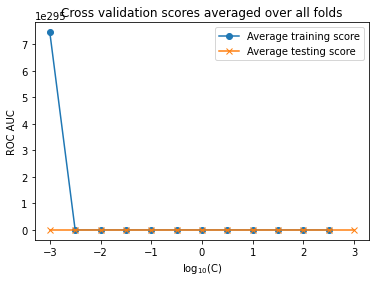

In [249]:
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis=0), '-o',
        label='Average training score')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-x',
        label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation scores averaged over all folds')

Its almost same dont think that there is more effect of regularisation.